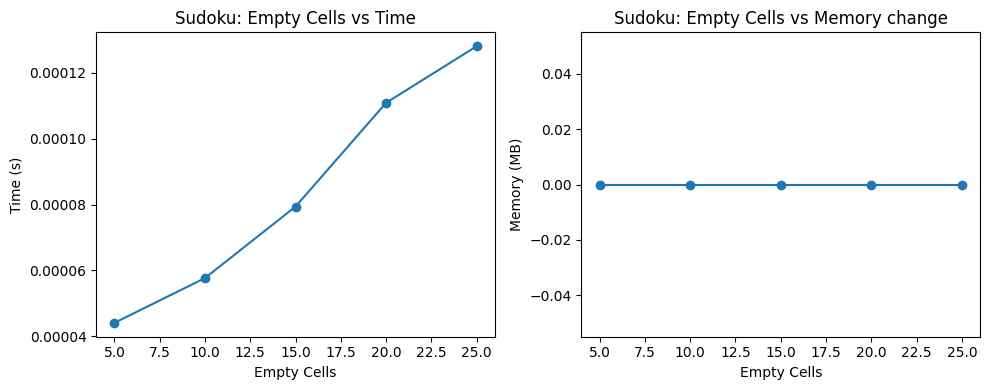

Solving example Sudoku (may take some time for harder variants)...
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]

Note: Backtracking worst-case is exponential in empty cells; recursion depth ~ number of blanks.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

def is_safe(board, r, c, num):
    # row and column
    for x in range(9):
        if board[r][x] == num or board[x][c] == num:
            return False
    # 3x3 box
    sr, sc = 3*(r//3), 3*(c//3)
    for i in range(sr, sr+3):
        for j in range(sc, sc+3):
            if board[i][j] == num:
                return False
    return True

def solve_sudoku(board):
    for r in range(9):
        for c in range(9):
            if board[r][c] == 0:
                for num in range(1, 10):
                    if is_safe(board, r, c, num):
                        board[r][c] = num
                        if solve_sudoku(board):
                            return True
                        board[r][c] = 0
                return False
    return True

def profile_sudoku(blank_counts=[5,10,15,20,25]):
    times = []; mems = []
    solved = [
        [5,3,4,6,7,8,9,1,2],
        [6,7,2,1,9,5,3,4,8],
        [1,9,8,3,4,2,5,6,7],
        [8,5,9,7,6,1,4,2,3],
        [4,2,6,8,5,3,7,9,1],
        [7,1,3,9,2,4,8,5,6],
        [9,6,1,5,3,7,2,8,4],
        [2,8,7,4,1,9,6,3,5],
        [3,4,5,2,8,6,1,7,9]
    ]
    for blanks in blank_counts:
        board = deepcopy(solved)
        coords = [(i,j) for i in range(9) for j in range(9)]
        np.random.shuffle(coords)
        for k in range(min(blanks, 81)):
            i,j = coords[k]
            board[i][j] = 0
        _, t, m = measure_time_and_memory(solve_sudoku, args=(deepcopy(board),))
        times.append(t); mems.append(m)
    return blank_counts, times, mems

# Run profiling and plot
blank_counts, times, mems = profile_sudoku()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(blank_counts, times, marker='o')
plt.title("Sudoku: Empty Cells vs Time")
plt.xlabel("Empty Cells"); plt.ylabel("Time (s)")
plt.subplot(1,2,2)
plt.plot(blank_counts, mems, marker='o')
plt.title("Sudoku: Empty Cells vs Memory change")
plt.xlabel("Empty Cells"); plt.ylabel("Memory (MB)")
plt.tight_layout(); plt.show()

# Example puzzle
puzzle = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]
print("Solving example Sudoku (may take some time for harder variants)...")
solve_sudoku(puzzle)
for row in puzzle:
    print(row)
print("\nNote: Backtracking worst-case is exponential in empty cells; recursion depth ~ number of blanks.")
